# Simple HMM Demo


In [1]:
# This is pretty enough for the show

import ghmm 


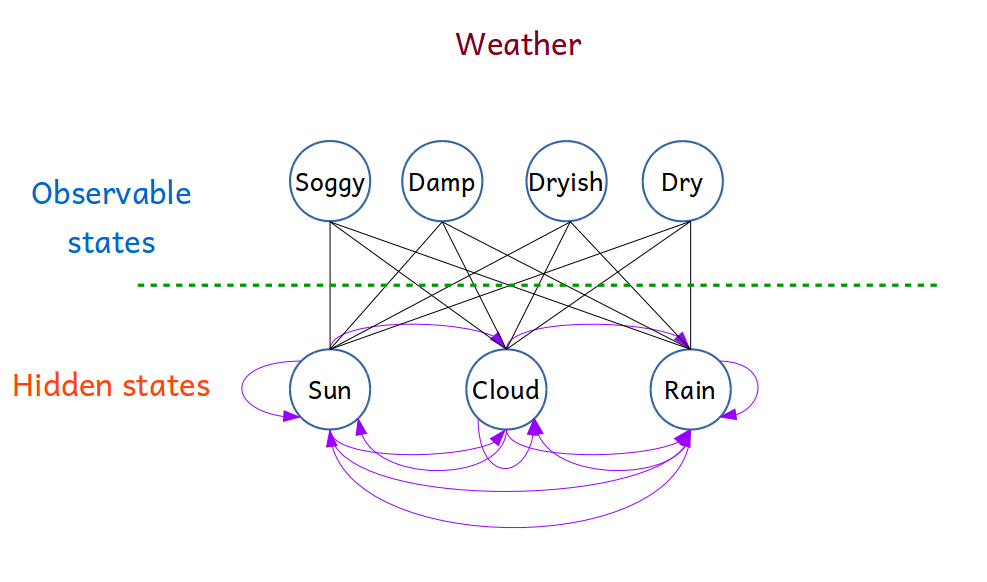

In [2]:
from IPython.display import Image
image = Image('example1.png')
image

### Define the number of outcomes (No. of classes)

The range of sigma values shows the number of outcomes in the model. In this case its simple 4 observable states

In [3]:
sigma = ghmm.IntegerRange(0, 4)

### Transition matrix: rows and columns means origin and destiny states  
Transition probability between states - This is what need to be seeked, since this is the hidden thing


In [4]:
transitions_probabilities = [
    [0.8, 0.1, 0.1], # Sunny 
    [0.1, 0.8, 0.1], # Cloud
    [0.1, 0.1, 0.8], # Rain
]


### Emission matrix: rows and columns means states and symbols respectively  
Emission probability for each classes

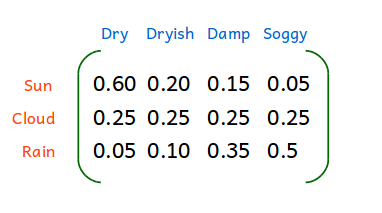

In [5]:
image2 = Image('emission.png')
image2

In [6]:
emissions_probabilities = [
    [0.60, 0.20, 0.15, 0.05], 
    [0.25, 0.25, 0.25, 0.25],
    [0.05, 0.10, 0.35, 0.05],  
]


#### My fancy function

In [7]:
obs_states = {'dry':'0','dryish':'1','damp':'1','soggy':'3'}
hidden_states = {'0':'sun','1':'cloud','2':'rain'}

def predict(inseq):
    inseq = [obs_states[items.lower()] for items in inseq]
    inseq = [ int(x) for x in inseq ]
    
    
    # Viterbi calculation
    sequence = ghmm.EmissionSequence(sigma, inseq) # model.predict() 
    viterbi_path, _ = hmm.viterbi(sequence) # Output 
    
    vit_path = [hidden_states[str(item)] for item in viterbi_path]

    # Print the sequence that viterbi algo has learnt
    print 'The viterbi output: \n'
    print vit_path
    
    # Get the probability for predictions / states
    states_probabilities = hmm.posterior(sequence)

    # Print the corresponding state probabilities / class probabilities
    print 'State emission probability : \n'
    print states_probabilities


    

### Probability of initial states 

In [8]:
pi = [0.3,0.4,0.3] # Sun, Cloud , Rain

### Model the HMM - Training

In [9]:
hmm = ghmm.HMMFromMatrices(
    sigma,
    # you can model HMMs with others emission probability distributions
    ghmm.DiscreteDistribution(sigma),    
    transitions_probabilities,
    emissions_probabilities,
    pi
)



### Show the model

In [10]:
# Print the HMM model
print '\n HMM model :\n'
print hmm



 HMM model :

DiscreteEmissionHMM(N=3, M=4)
  state 0 (initial=0.30)
    Emissions: 0.60, 0.20, 0.15, 0.05
    Transitions: ->0 (0.80), ->1 (0.10), ->2 (0.10)
  state 1 (initial=0.40)
    Emissions: 0.25, 0.25, 0.25, 0.25
    Transitions: ->0 (0.10), ->1 (0.80), ->2 (0.10)
  state 2 (initial=0.30)
    Emissions: 0.05, 0.10, 0.35, 0.05
    Transitions: ->0 (0.10), ->1 (0.10), ->2 (0.80)



In [11]:
observed = ['dry','dry','dry','soggy','soggy','damp','damp','damp']

In [12]:
predict(observed)

The viterbi output: 

['sun', 'sun', 'sun', 'cloud', 'cloud', 'cloud', 'cloud', 'cloud']
State emission probability : 

[[0.6757938291336877, 0.311192813287889, 0.013013357578423427], [0.6622124366602999, 0.33240655618357834, 0.005381007156121976], [0.5283172986556189, 0.4644874971301038, 0.0071952042142775586], [0.15507565160952497, 0.8263368993898565, 0.0185874490006188], [0.09345677855239763, 0.8895584462574269, 0.016984775190175855], [0.1396071721631736, 0.8349657617740657, 0.025427066062760954], [0.1827343779346783, 0.7793525089298237, 0.03791311313549816], [0.22377178133072037, 0.7087079408297199, 0.06752027783955976]]
